Работа с Data Frame

In [1]:
import numpy as np
import pandas as ps

In [2]:
%matplotlib inline

In [3]:
%%time
1 + 1

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.9 µs


2

In [4]:
def dev():
    return 1 / 0

dev()

ZeroDivisionError: division by zero

In [ ]:
df = ps.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':[7,7,7]})
df

In [ ]:
df.info()

In [6]:
df = ps.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':[7,7,7]}, index=['UK', 'UA', 'USA'])
df

,A,B,C
UK,1,4,7
UA,2,5,7
USA,3,6,7


In [ ]:
df2 = ps.DataFrame({'A1': [1,2,3], 'B1': [4,5,6], 'C1':[7,7,7]}, index=['UK', 'UA', 'USA'])
df2

In [ ]:
df2 & df

In [29]:
f = df.join(df2)
f

,A,B,C,A1,B1,C1
UK,1,4,7,1,4,7
UA,2,5,7,2,5,7
USA,3,6,7,3,6,7


In [12]:
df.isna()

,A,B,C
UK,False,False,False
UA,False,False,False
USA,False,False,False


In [30]:
s1 = ps.Series([1,2,3], index=['A', 'B', 'C'])
print(s1)
f1 = df.append(s1, ignore_index=True)
f1

A    1
B    2
C    3
dtype: int64


,A,B,C
0,1,4,7
1,2,5,7
2,3,6,7
3,1,2,3


In [32]:
f.loc[(f.A>=2) & (f.B<=6)]


,A,B,C,A1,B1,C1
UA,2,5,7,2,5,7
USA,3,6,7,3,6,7


In [33]:
h = f.loc[f.A>=2, 'A'];
h

UA     2
USA    3
Name: A, dtype: int64

In [34]:
df = ps.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':[7,7,7]})
print(df)
df2 = ps.DataFrame({'A': [1,2,3], 'B': [4,57,6], 'C3':[73,7,7]})
print(df2)
print(df.merge(df2))
result = ps.merge(df,df2)
print(result)

   A  B  C
0  1  4  7
1  2  5  7
2  3  6  7
   A   B  C3
0  1   4  73
1  2  57   7
2  3   6   7
   A  B  C  C3
0  1  4  7  73
1  3  6  7   7
   A  B  C  C3
0  1  4  7  73
1  3  6  7   7


In [35]:
df.shape

(3, 3)

In [36]:
df

,A,B,C
0,1,4,7
1,2,5,7
2,3,6,7


In [37]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [38]:
df['A'] = df['A'].astype('float')
df

,A,B,C
0,1.0,4,7
1,2.0,5,7
2,3.0,6,7


In [66]:
df = ps.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':[7,7,7]})
df

,A,B,C
0,1,4,7
1,2,5,7
2,3,6,7


In [67]:
df2 = ps.DataFrame({'A2': [1,2,31], 'B2': [4,5,6], 'C3':[73,7,7]})
df2

,A2,B2,C3
0,1,4,73
1,2,5,7
2,31,6,7


In [68]:
df_joined = df.join(df2)
df_joined

,A,B,C,A2,B2,C3
0,1,4,7,1,4,73
1,2,5,7,2,5,7
2,3,6,7,31,6,7


In [69]:
df_joined.describe()

,A,B,C,A2,B2,C3
count,3.0,3.0,3.0,3.000000,3.0,3.000000
mean,2.0,5.0,7.0,11.333333,5.0,29.000000
std,1.0,1.0,0.0,17.039171,1.0,38.105118
min,1.0,4.0,7.0,1.000000,4.0,7.000000
25%,1.5,4.5,7.0,1.500000,4.5,7.000000
50%,2.0,5.0,7.0,2.000000,5.0,7.000000
75%,2.5,5.5,7.0,16.500000,5.5,40.000000
max,3.0,6.0,7.0,31.000000,6.0,73.000000


In [70]:
df_joined.sort_values(by='A2', ascending=False).head(2)

,A,B,C,A2,B2,C3
2,3,6,7,31,6,7
1,2,5,7,2,5,7


In [71]:
print(df_joined)
df_joined.apply(lambda x: x + 1)

   A  B  C  A2  B2  C3
0  1  4  7   1   4  73
1  2  5  7   2   5   7
2  3  6  7  31   6   7


,A,B,C,A2,B2,C3
0,2,5,8,2,5,74
1,3,6,8,3,6,8
2,4,7,8,32,7,8


In [72]:
df_joined.mean()

A      2.000000
B      5.000000
C      7.000000
A2    11.333333
B2     5.000000
C3    29.000000
dtype: float64

In [73]:
df_joined.rename(columns={'B2': 'Z'}, inplace=True)
df_joined

,A,B,C,A2,Z,C3
0,1,4,7,1,4,73
1,2,5,7,2,5,7
2,3,6,7,31,6,7


In [74]:
df_joined[['A', 'B']]

,A,B
0,1,4
1,2,5
2,3,6


In [75]:
df_joined.drop('C3', axis=1)

,A,B,C,A2,Z
0,1,4,7,1,4
1,2,5,7,2,5
2,3,6,7,31,6


In [65]:
df_joined.drop('C3', axis=1, inplace=True)
df_joined

KeyError: "['C3'] not found in axis"

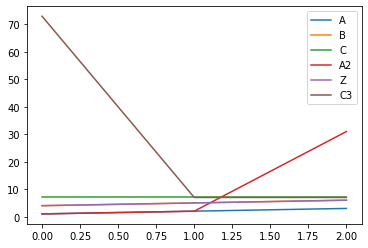

In [76]:
df_joined.plot()

In [77]:
df_joined.T

,0,1,2
A,1,2,3
B,4,5,6
C,7,7,7
A2,1,2,31
Z,4,5,6
C3,73,7,7


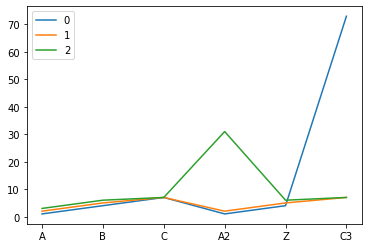

In [78]:
df_joined.T.plot()

In [79]:
df = ps.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C':[7,7,7]}, index=['UA', 'UK', 'USA'])
df

,A,B,C
UA,1,4,7
UK,2,5,7
USA,3,6,7


In [80]:
df2 = ps.DataFrame({'A2': [1,2,31], 'B2': [4,5,6], 'C3':[73,7,7]}, index=['UA', 'UK', 'USA'])
df2

,A2,B2,C3
UA,1,4,73
UK,2,5,7
USA,31,6,7


In [81]:
df_joined = df.join(df2)
df_joined

,A,B,C,A2,B2,C3
UA,1,4,7,1,4,73
UK,2,5,7,2,5,7
USA,3,6,7,31,6,7


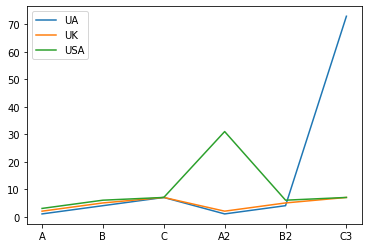

In [82]:
df_joined.T.plot()

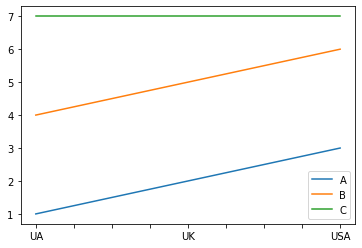

In [83]:
df.plot()

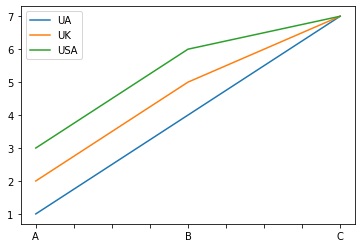

In [84]:
df.T.plot()

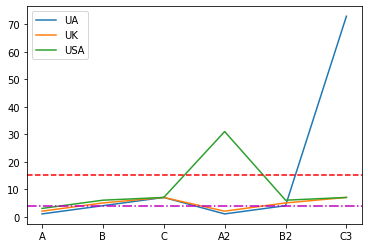

In [85]:
pl = df_joined.T.plot()
pl.axhline(df_joined.T['UA'].mean(),  color='r', linestyle='--')
pl.axhline(df_joined.T['UA'].median(), color='m', linestyle='-.')

In [92]:
df = ps.read_csv('Statistic.csv', sep=';')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  24 non-null     object
 1   gender   24 non-null     object
 2   param    24 non-null     object
 3   number   24 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 896.0+ bytes


,disease,gender,param,number
0,A,men,suspicion,825
1,A,men,confirmed,512
2,A,women,suspicion,108
3,A,women,confirmed,89
4,B,men,suspicion,560
5,B,men,confirmed,353
6,B,women,suspicion,25
7,B,women,confirmed,17
8,C,men,suspicion,325
9,C,men,confirmed,120


In [93]:
pt = ps.pivot_table(df, aggfunc=sum, index='gender', columns='param', values='number')
pt

param,confirmed,suspicion
gender,,
men,1192,2590
women,557,1835


In [94]:
df = ps.pivot_table(df, index='disease', columns = ['gender', 'param'], values='number')
df

gender        men               women          
param   confirmed suspicion confirmed suspicion
disease                                        
A             512       825        89       108
B             353       560        17        25
C             120       325       202       593
D             138       417       131       375
E              53       191        94       393
F              16       272        24       341

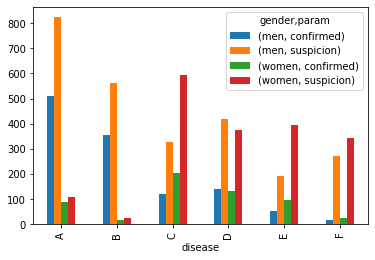

In [98]:
df.plot(kind="bar")

In [99]:
pt['%'] = 100*pt.confirmed/pt.suspicion
pt

param,confirmed,suspicion,%
gender,,,
men,1192,2590,46.023166
women,557,1835,30.354223


In [100]:
df['women']

param,confirmed,suspicion
disease,,
A,89,108
B,17,25
C,202,593
D,131,375
E,94,393
F,24,341


In [101]:
df_total = (df['men'] + df['women']).T
df_total['gender'] = 'total'
df_total.set_index('gender', append=True, inplace=True)
df_total = df_total.reorder_levels(['gender', 'param']).T
df_total

gender      total          
param   confirmed suspicion
disease                    
A             601       933
B             370       585
C             322       918
D             269       792
E             147       584
F              40       613

In [102]:
df = ps.concat([df, df_total], axis=1)
df

gender        men               women               total          
param   confirmed suspicion confirmed suspicion confirmed suspicion
disease                                                            
A             512       825        89       108       601       933
B             353       560        17        25       370       585
C             120       325       202       593       322       918
D             138       417       131       375       269       792
E              53       191        94       393       147       584
F              16       272        24       341        40       613

In [103]:
df['men','%'] = 100*df['men','confirmed']/df['men','suspicion']
df['women','%'] = 100*df['women','confirmed']/df['women','suspicion']
df['total','%'] = 100*df['total','confirmed']/df['total','suspicion']
df

gender        men               women               total            \
param   confirmed suspicion confirmed suspicion confirmed suspicion   
disease                                                               
A             512       825        89       108       601       933   
B             353       560        17        25       370       585   
C             120       325       202       593       322       918   
D             138       417       131       375       269       792   
E              53       191        94       393       147       584   
F              16       272        24       341        40       613   

gender         men      women      total  
param            %          %          %  
disease                                   
A        62.060606  82.407407  64.415863  
B        63.035714  68.000000  63.247863  
C        36.923077  34.064081  35.076253  
D        33.093525  34.933333  33.964646  
E        27.748691  23.918575  25.171233  
F         5.882353   7.038123   6.525285

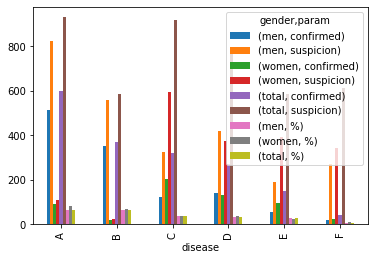

In [105]:
df.plot(kind="bar")

In [43]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python